# Comparing Corpus Visualizers on Yellowbrick


In [3]:
##### Import all the necessary Libraries

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import UMAPVisualizer

### UMAP vs T-SNE

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data

1. The data is uniformly distributed on a Riemannian manifold;
2. The Riemannian metric is locally constant (or can be approximated as such);
3. The manifold is locally connected.

From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.



In [9]:
####### TO DOWNLOAD THE DATASETS ##############
import os
from sklearn.datasets.base import Bunch
from yellowbrick.download import download_all

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "hobbies": os.path.join(FIXTURES, "hobbies")
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in text corpus by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
    
    # Read the directories in the directory as the categories. 
    categories = [
        cat for cat in os.listdir(path) 
        if os.path.isdir(os.path.join(path, cat))
    ]
    
    files  = [] # holds the file names relative to the root 
    data   = [] # holds the text read from the file 
    target = [] # holds the string of the category 
        
    # Load the data from the files in the corpus 
    for cat in categories:
        for name in os.listdir(os.path.join(path, cat)):
            files.append(os.path.join(path, cat, name))
            target.append(cat)
            
            with open(os.path.join(path, cat, name), 'r') as f:
                data.append(f.read())
        
    
    # Return the data bunch for use similar to the newsgroups example
    return Bunch(
        categories=categories,
        files=files,
        data=data,
        target=target,
    )

corpus = load_data('hobbies')
hobby_types  = {}

for category in corpus.categories:
    texts = []
    for idx in range(len(corpus.data)):
        if corpus['target'][idx] == category:
            texts.append(' '.join(corpus.data[idx].split()))
    hobby_types[category] = texts
    
####### TO DOWNLOAD THE DATASETS ##############

### Writing a Function to quickly Visualize Corpus 

Which can then be used for rapid comparison

In [12]:
def visualize(dim_reduction,encoding,corpus,labels = True,alpha=0.7,metric=None):
    corpus = load_data(corpus)
    if 'tfidf' in encoding.lower():
        encode  = TfidfVectorizer()
    if 'count' in encoding.lower():
        encode = CountVectorizer()
    docs   = encode.fit_transform(corpus.data)
    if labels is True:
        labels = corpus.target
    else:
        labels = None
    if 'umap' in dim_reduction.lower():
        if metric is None:
            viz   = UMAPVisualizer()
        else:
            viz = UMAPVisualizer(metric=metric)
    if 't-sne' in dim_reduction.lower():
        viz = TSNEVisualizer(alpha = alpha)
    viz.fit(docs,labels)
    viz.poof()

### Quickly Comparing Plots by Controlling 

- The Dimensionality Reduction technique used 
- The Encoding Technique used 
- The dataset to be visualized 
- Whether to differentiate Labels or not 
- Set the alpha parameter
- Set the metric for UMAP 

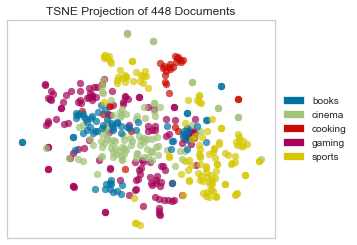

In [13]:
visualize('t-sne','tfidf','hobbies')

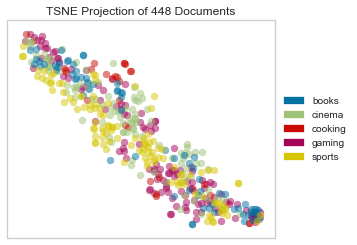

In [68]:
visualize('t-sne','count','hobbies',alpha = 0.5)

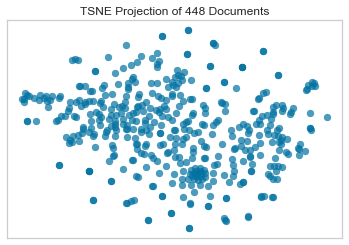

In [66]:
visualize('t-sne','tfidf','hobbies',labels =False)

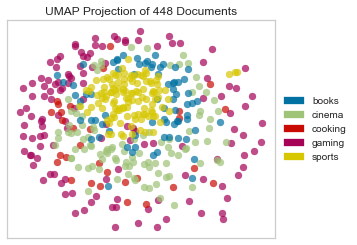

In [62]:
visualize('umap','tfidf','hobbies')

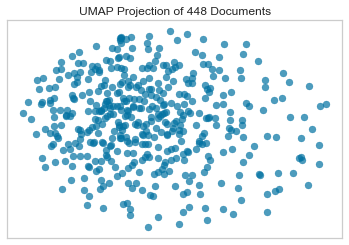

In [63]:
visualize('umap','tfidf','hobbies',labels = False)

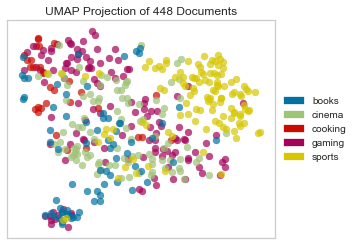

In [67]:
visualize('umap','count','hobbies',metric= 'cosine')